<a href="https://colab.research.google.com/github/zhoumaneo/colab_Cactus-Identification/blob/master/model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
# Setup Kaggle API
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhoumaneo","key":"9df02d20a6dbe3389a2633eabf7de991"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Download dataset
!mkdir -p data
!kaggle competitions download -c aerial-cactus-identification

  0% 0.00/667k [00:00<?, ?B/s]
100% 667k/667k [00:00<00:00, 91.0MB/s]
  0% 0.00/160k [00:00<?, ?B/s]
100% 160k/160k [00:00<00:00, 50.1MB/s]
100% 4.20M/4.20M [00:00<00:00, 30.3MB/s]

 88% 17.0M/19.2M [00:00<00:00, 34.1MB/s]
100% 19.2M/19.2M [00:00<00:00, 64.1MB/s]


In [0]:
! cp test.zip /content/data
! cp train.zip /content/data
! cp train.csv /content/data

In [0]:
# Unzip dataset
!unzip data/train.zip -d data
!unzip data/test.zip -d data

Archive:  data/train.zip
   creating: data/train/
  inflating: data/train/008bd3d84a1145e154409c124de7cee9.jpg  
  inflating: data/train/0090d921aeb53be7e3df6f4b0254c537.jpg  
  inflating: data/train/00e9930f89b5f94f90d0285632f25e9d.jpg  
  inflating: data/train/00e9d95c663af530b8769d37f92cb13a.jpg  
  inflating: data/train/0148bb4a295cf49c0169d69a4a63df7e.jpg  
  inflating: data/train/01506b63fb89b2bde4df0d1d63a3004b.jpg  
  inflating: data/train/015a4952d1ec690fd14c36d35395deec.jpg  
  inflating: data/train/01e30c0ba6e91343a12d2126fcafc0dd.jpg  
  inflating: data/train/0251debcce56e3e7fab5537a74761378.jpg  
  inflating: data/train/0290af70d02cbc47e66e4715e6f19ac5.jpg  
  inflating: data/train/02abf14275d208b1b43f220fa15519cb.jpg  
  inflating: data/train/02d8f310b2979172949fbcd8b52bafd4.jpg  
  inflating: data/train/030de43ad2c8575c3096f57553013461.jpg  
  inflating: data/train/038ecf71fb293a655c150a9008219089.jpg  
  inflating: data/train/0452e33a16b0a831e8d02c42adadf949.jpg  
  inf

In [0]:
!pip install tensorflow==2.0.0-alpha0

from tensorflow.python.ops import control_flow_util
control_flow_util.ENABLE_CONTROL_FLOW_V2 = True

In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

from os import listdir

In [0]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
train_dir = '/content/data/train/'
train_imgs = listdir(train_dir)
nr_train_images = len(train_imgs)
nr_train_images

17500

In [0]:
train_lables_df = pd.read_csv('/content/data/train.csv', index_col='id')
print('Total entries: ' + str(train_lables_df.size))
print(train_lables_df.head(10))

Total entries: 17500
                                      has_cactus
id                                              
0004be2cfeaba1c0361d39e2b000257b.jpg           1
000c8a36845c0208e833c79c1bffedd1.jpg           1
000d1e9a533f62e55c289303b072733d.jpg           1
0011485b40695e9138e92d0b3fb55128.jpg           1
0014d7a11e90b62848904c1418fc8cf2.jpg           1
0017c3c18ddd57a2ea6f9848c79d83d2.jpg           1
002134abf28af54575c18741b89dd2a4.jpg           0
0024320f43bdd490562246435af4f90b.jpg           0
002930423b9840e67e5a54afd4768a1e.jpg           1
00351838ebf6dff6e53056e00a1e307c.jpg           1


In [0]:
train_lables_df['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

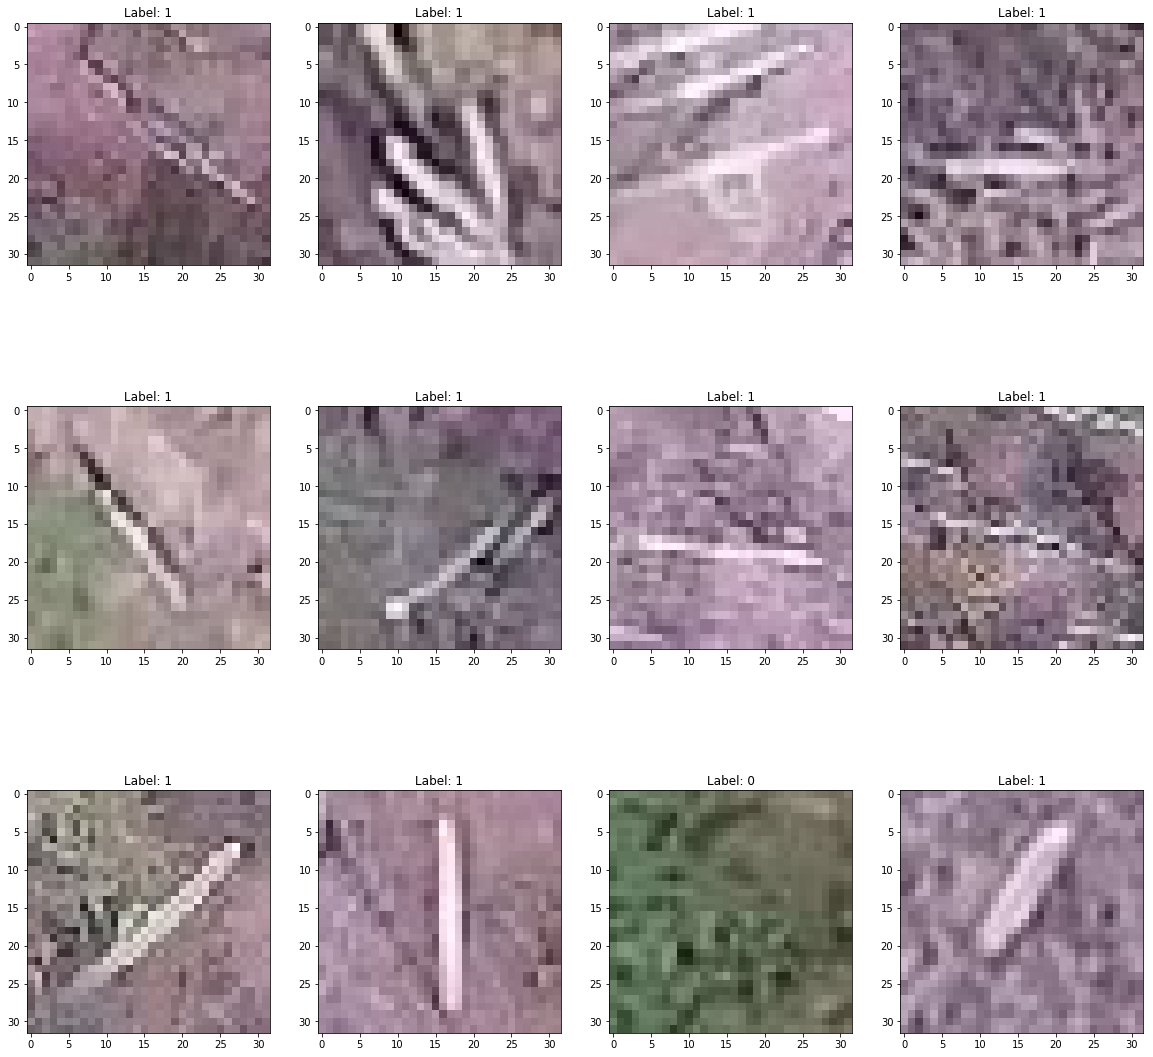

In [0]:
def get_test_image_path(id):
    return train_dir + id

def draw_cactus_image(id, ax):
    path = get_test_image_path(id)
    img = mpimg.imread(path)
    plt.imshow(img)
    ax.set_title('Label: ' + str(train_lables_df.loc[id]['has_cactus']))

fig = plt.figure(figsize=(20,20))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    draw_cactus_image(train_imgs[i], ax)

In [0]:
train_image_paths = [train_dir + ti for ti in train_imgs]
train_image_labels = [train_lables_df.loc[ti]['has_cactus'] for ti in train_imgs]

for i in range(10):
    print(train_image_paths[i], train_image_labels[i])

/content/data/train/fbe2c6eac932b06a020fff68b98ea5ae.jpg 1
/content/data/train/832654dea6e6d520715cd80911a50e1c.jpg 1
/content/data/train/05a63171b131df5a5e6301e44fc6dfa4.jpg 1
/content/data/train/36c5ed00a74d693fc55db4ab87388d16.jpg 1
/content/data/train/8c49eaaebeb0cab4946afb5e646bdff4.jpg 1
/content/data/train/2ad79a6d6fe6ec08a59b3542c8b967cf.jpg 1
/content/data/train/1231977dabe5069f958813412a6ee01d.jpg 1
/content/data/train/4a9dbb0f1efb897a798b93b44ca89348.jpg 1
/content/data/train/ab94dd9600451a6f6382edcbe1101441.jpg 1
/content/data/train/1279a69c278f30a19e7588d2407917d9.jpg 1


### image to tf.tensor

mian funciton: 1) tf.io.read_file(); 2) tf.image.decode_image(); 3) tf.cast()

In [0]:
def img_to_tensor(img_path):
    img_tensor = tf.cast(tf.image.decode_image(tf.io.read_file(img_path)), tf.float32)
    img_tensor /= 255.0 # normalized to [0,1]
    # normalized to [-1,1]
    # img_tensor = img_tensor/127.5 -1 
    return img_tensor

img_to_tensor(train_image_paths[0])

<tf.Tensor: id=19, shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.7411765 , 0.5921569 , 0.68235296],
        [0.7019608 , 0.5529412 , 0.6431373 ],
        [0.72156864, 0.57254905, 0.654902  ],
        ...,
        [0.60784316, 0.52156866, 0.5686275 ],
        [0.61960787, 0.53333336, 0.58431375],
        [0.6627451 , 0.5764706 , 0.627451  ]],

       [[0.7882353 , 0.6392157 , 0.7294118 ],
        [0.73333335, 0.58431375, 0.6745098 ],
        [0.69803923, 0.54901963, 0.6313726 ],
        ...,
        [0.5921569 , 0.5058824 , 0.5529412 ],
        [0.61960787, 0.53333336, 0.58431375],
        [0.627451  , 0.5411765 , 0.5921569 ]],

       [[0.67058825, 0.52156866, 0.6039216 ],
        [0.68235296, 0.53333336, 0.6156863 ],
        [0.6666667 , 0.5294118 , 0.60784316],
        ...,
        [0.5647059 , 0.4745098 , 0.5137255 ],
        [0.56078434, 0.46666667, 0.5176471 ],
        [0.5058824 , 0.4117647 , 0.4627451 ]],

       ...,

       [[0.27058825, 0.23529412, 0.25490198],
        

### Split train set

In [0]:
#split dataset
X_train, X_valid, y_train, y_valid = train_test_split(train_image_paths, train_image_labels, test_size=0.2)

def process_image_in_record(path, label):
    return img_to_tensor(path), label

def build_training_dataset(paths, labels, batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    # map function 
    ds = ds.map(process_image_in_record)
    ds = ds.shuffle(buffer_size = len(paths))
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

def build_validation_dataset(paths, labels, batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_image_in_record)
    ds = ds.batch(batch_size)
    return ds

train_ds = build_training_dataset(X_train, y_train)
validation_ds = build_validation_dataset(X_valid, y_valid)

In [0]:
X_train[0],y_train[0]

('/content/data/train/8527045008dfd54a0517bca8e706fba8.jpg', 0)

In [0]:
tf.data.Dataset.from_tensor_slices((X_train, y_train)).map(process_image_in_record)

<MapDataset shapes: (<unknown>, ()), types: (tf.float32, tf.int32)>

In [0]:
train_ds,validation_ds

(<PrefetchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int32)>)

In [0]:
mini_train_ds = build_training_dataset(X_train[:5], y_train[:5], batch_size=2)
# Fetch and print the first batch of 2 images
for images, labels in mini_train_ds.take(1):
    print(images)
    print(labels)

tf.Tensor(
[[[[0.61960787 0.59607846 0.6039216 ]
   [0.6509804  0.627451   0.63529414]
   [0.6627451  0.6392157  0.64705884]
   ...
   [0.62352943 0.6        0.60784316]
   [0.627451   0.6039216  0.6117647 ]
   [0.6313726  0.60784316 0.6156863 ]]

  [[0.5882353  0.5647059  0.57254905]
   [0.6156863  0.5921569  0.6       ]
   [0.63529414 0.6117647  0.61960787]
   ...
   [0.627451   0.6039216  0.6117647 ]
   [0.627451   0.6039216  0.6117647 ]
   [0.627451   0.6039216  0.6117647 ]]

  [[0.5803922  0.5568628  0.5647059 ]
   [0.59607846 0.57254905 0.5803922 ]
   [0.6156863  0.5921569  0.6       ]
   ...
   [0.627451   0.6039216  0.6117647 ]
   [0.62352943 0.6        0.60784316]
   [0.62352943 0.6        0.60784316]]

  ...

  [[0.627451   0.6039216  0.6117647 ]
   [0.6039216  0.5803922  0.5882353 ]
   [0.63529414 0.6117647  0.61960787]
   ...
   [0.5921569  0.5686275  0.5764706 ]
   [0.59607846 0.57254905 0.5803922 ]
   [0.6392157  0.6156863  0.62352943]]

  [[0.58431375 0.56078434 0.568627

### Build model set some hyperparameters and structure
#### demo_1: feed-forward network


```
#layers.Flatten
__init__(
    data_format=None,
    **kwargs
)

#layers.Dense
__init__(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

#model.compile
compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,
    **kwargs
)
```



In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



```
# model.fit
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    **kwargs
)
```



In [0]:
history = model.fit(train_ds, epochs=20, steps_per_epoch=400, validation_data=validation_ds)

Epoch 1/20
400/400 [==============================] - 11s 28ms/step - loss: 0.5030 - accuracy: 0.7478 - val_loss: 0.4774 - val_accuracy: 0.7814
Epoch 2/20
400/400 [==============================] - 6s 16ms/step - loss: 0.3982 - accuracy: 0.8062 - val_loss: 0.3772 - val_accuracy: 0.8066
Epoch 3/20
400/400 [==============================] - 6s 15ms/step - loss: 0.3452 - accuracy: 0.8340 - val_loss: 0.3318 - val_accuracy: 0.8557
Epoch 4/20
400/400 [==============================] - 6s 16ms/step - loss: 0.3487 - accuracy: 0.8313 - val_loss: 0.3165 - val_accuracy: 0.8623
Epoch 5/20
400/400 [==============================] - 6s 15ms/step - loss: 0.3353 - accuracy: 0.8527 - val_loss: 0.3249 - val_accuracy: 0.8566
Epoch 6/20
400/400 [==============================] - 6s 15ms/step - loss: 0.3050 - accuracy: 0.8706 - val_loss: 0.3590 - val_accuracy: 0.8314
Epoch 7/20
400/400 [==============================] - 6s 15ms/step - loss: 0.2973 - accuracy: 0.8680 - val_loss: 0.2980 - val_accuracy: 0.879

model.fit() function return History object

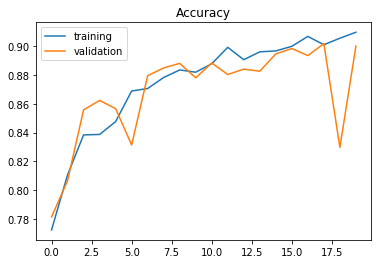

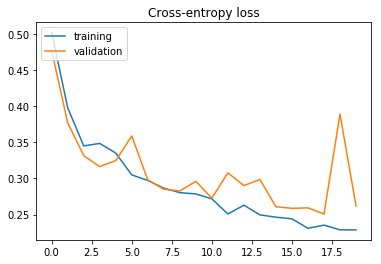

In [0]:
def plot_accuracies_and_losses(history):
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    plt.title('Cross-entropy loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

plot_accuracies_and_losses(history)

#### demo_2: CNN model


```
# layers.Conv2D
__init__(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

# layers.MaxPooling2D
__init__(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```



In [0]:
cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [0]:
history = cnn_model.fit(train_ds, epochs=20, steps_per_epoch=400, validation_data=validation_ds)

Epoch 1/20
400/400 [==============================] - 21s 53ms/step - loss: 0.2312 - accuracy: 0.9058 - val_loss: 0.1328 - val_accuracy: 0.9529
Epoch 2/20
400/400 [==============================] - 17s 42ms/step - loss: 0.1272 - accuracy: 0.9527 - val_loss: 0.0951 - val_accuracy: 0.9674
Epoch 3/20
400/400 [==============================] - 17s 42ms/step - loss: 0.1021 - accuracy: 0.9620 - val_loss: 0.0808 - val_accuracy: 0.9689
Epoch 4/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0748 - accuracy: 0.9712 - val_loss: 0.1002 - val_accuracy: 0.9606
Epoch 5/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0708 - accuracy: 0.9748 - val_loss: 0.0647 - val_accuracy: 0.9760
Epoch 6/20
400/400 [==============================] - 17s 41ms/step - loss: 0.0580 - accuracy: 0.9787 - val_loss: 0.1041 - val_accuracy: 0.9651
Epoch 7/20
400/400 [==============================] - 17s 42ms/step - loss: 0.0552 - accuracy: 0.9800 - val_loss: 0.0640 - val_accuracy:

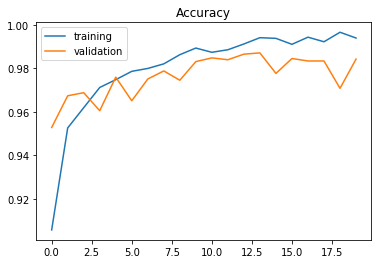

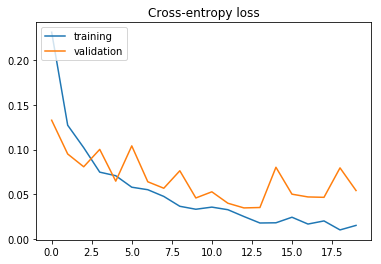

In [0]:
plot_accuracies_and_losses(history) 

In [0]:
cnn_model.layers

### Visualizing what the CNN learns

In [0]:
# Following the example in https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras
layer_outputs = [layer.output for layer in cnn_model.layers]
activation_model = tf.keras.Model(inputs=cnn_model.input, outputs=layer_outputs)

def print_example_and_activations(example, col_size, row_size, act_index): 
    example_array = img_to_tensor(example).numpy()
    plt.imshow(example_array)
    activations = activation_model.predict(example_array.reshape(1,32,32,3)) # batch of 1 - just the example array
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray') # image for the first (and only) element in the batch at activation_index
            activation_index += 1

In [0]:
X_train[0],y_train[0]

('/content/data/train/af59dd8cf62760ded113e85bb6066913.jpg', 1)

In [0]:
y_train

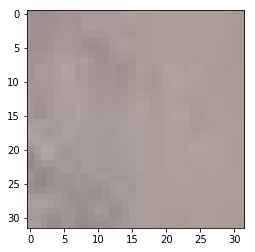

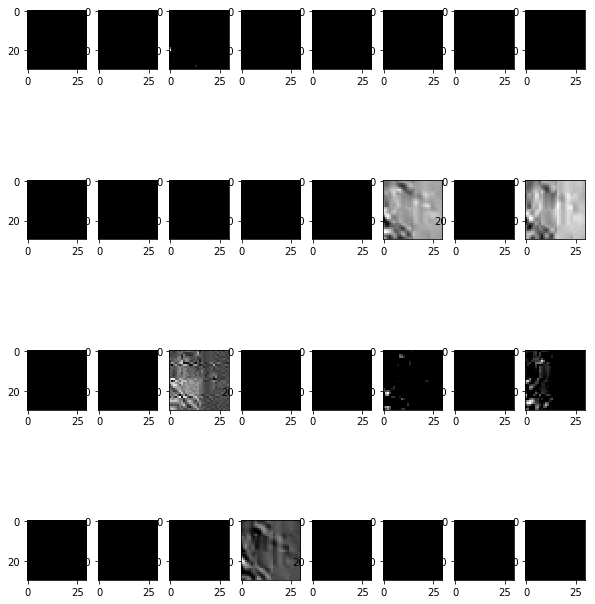

In [0]:
# Visualizing Xtrain[0]_layer 0
print_example_and_activations(X_train[2], 8, 4, 0)

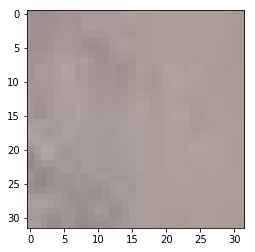

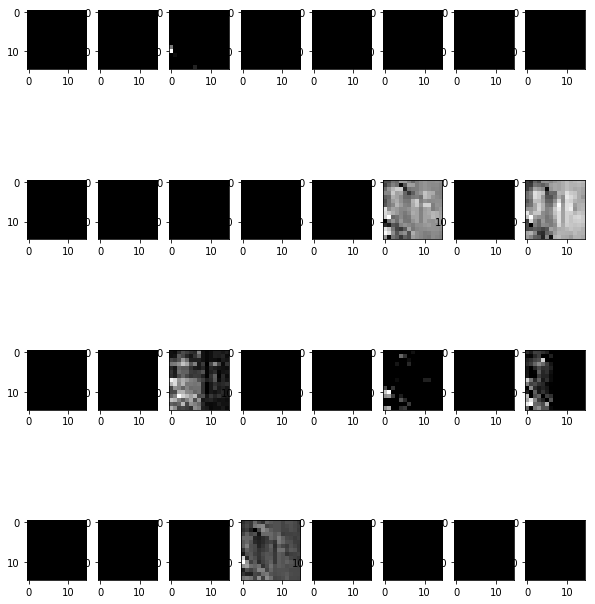

In [0]:
# Visualizing Xtrain[0]_layer 1
print_example_and_activations(X_train[2], 8, 4, 1)

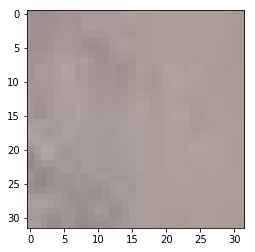

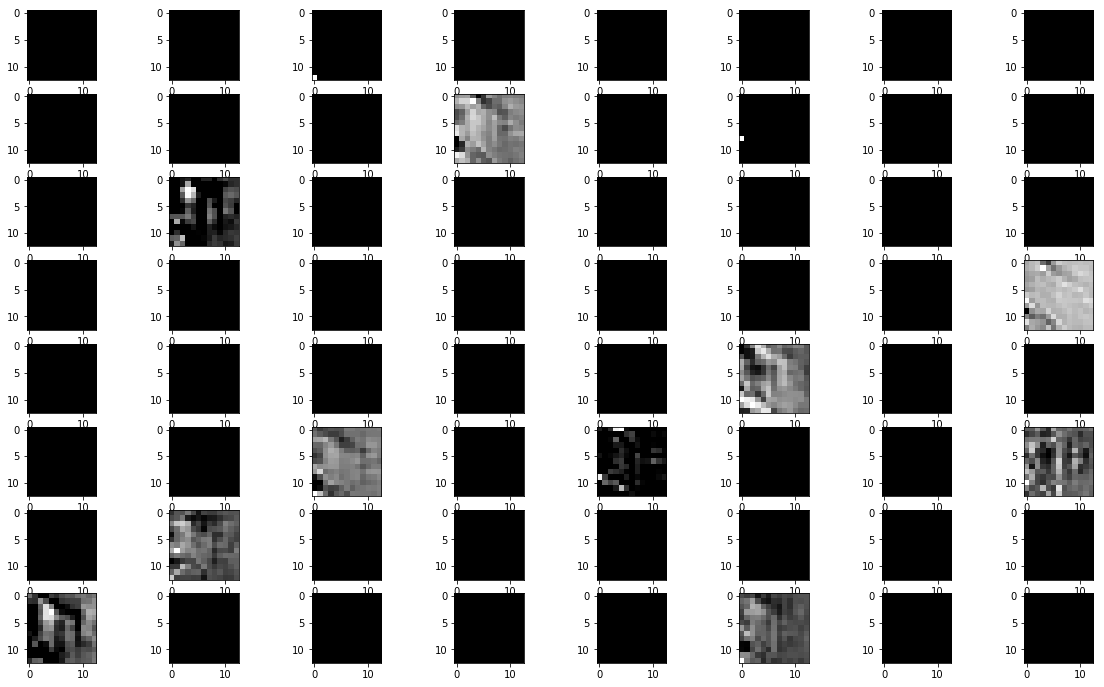

In [0]:
# Visualizing Xtrain[0]_layer 2
print_example_and_activations(X_train[2], 8, 8, 2)

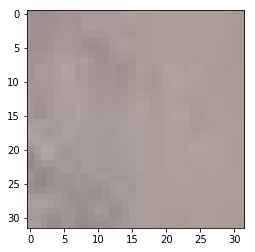

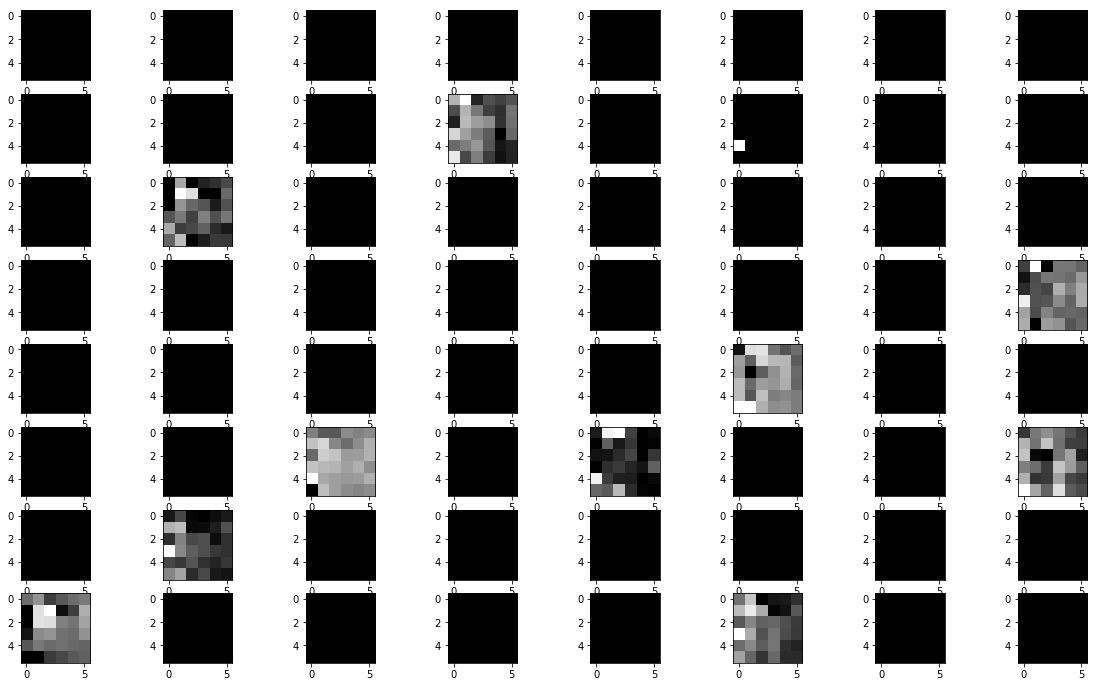

In [0]:
# Visualizing Xtrain[0]_layer 3
print_example_and_activations(X_train[2], 8, 8, 3)

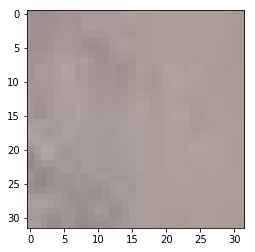

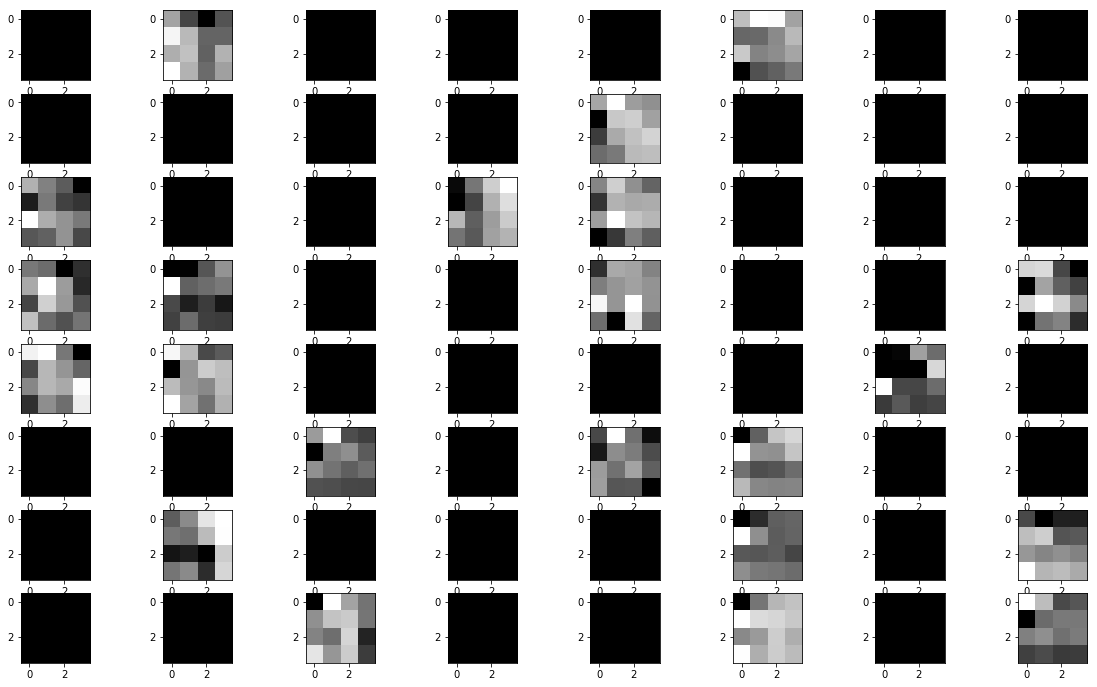

In [0]:
# Visualizing Xtrain[0]_layer 4
print_example_and_activations(X_train[2], 8, 8, 4)

In [0]:
X_train[12],y_train[12]

('/content/data/train/bdf90e777b173cbaeb4f31865af6a9aa.jpg', 1)

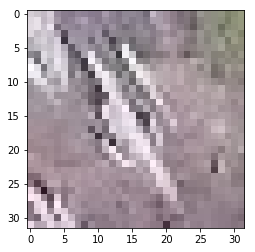

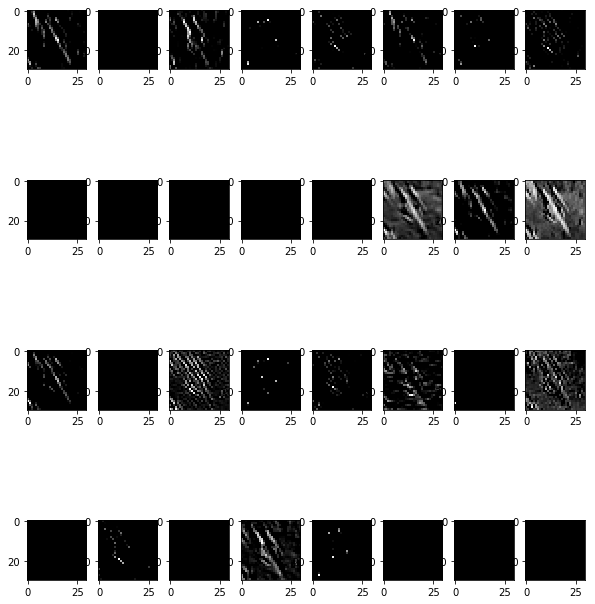

In [0]:
# Visualizing Xtrain[12]_layer 0
print_example_and_activations(X_train[12], 8, 4, 0)

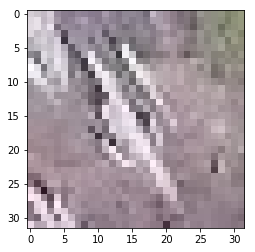

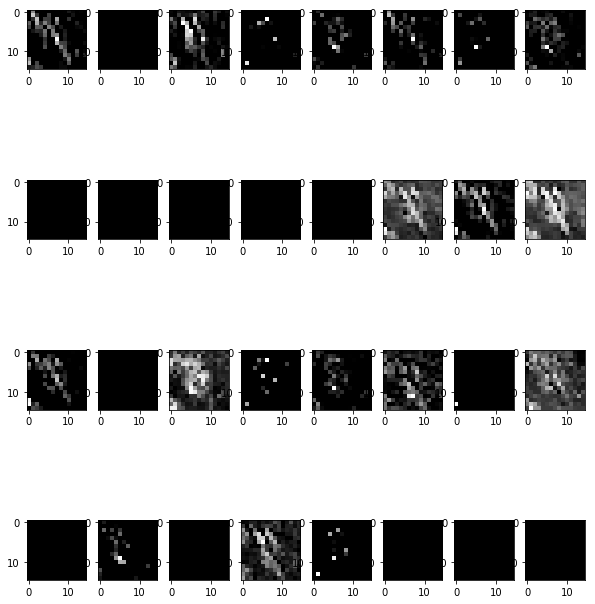

In [0]:
# Visualizing Xtrain[12]_layer 1
print_example_and_activations(X_train[12], 8, 4, 1)

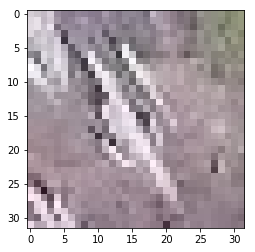

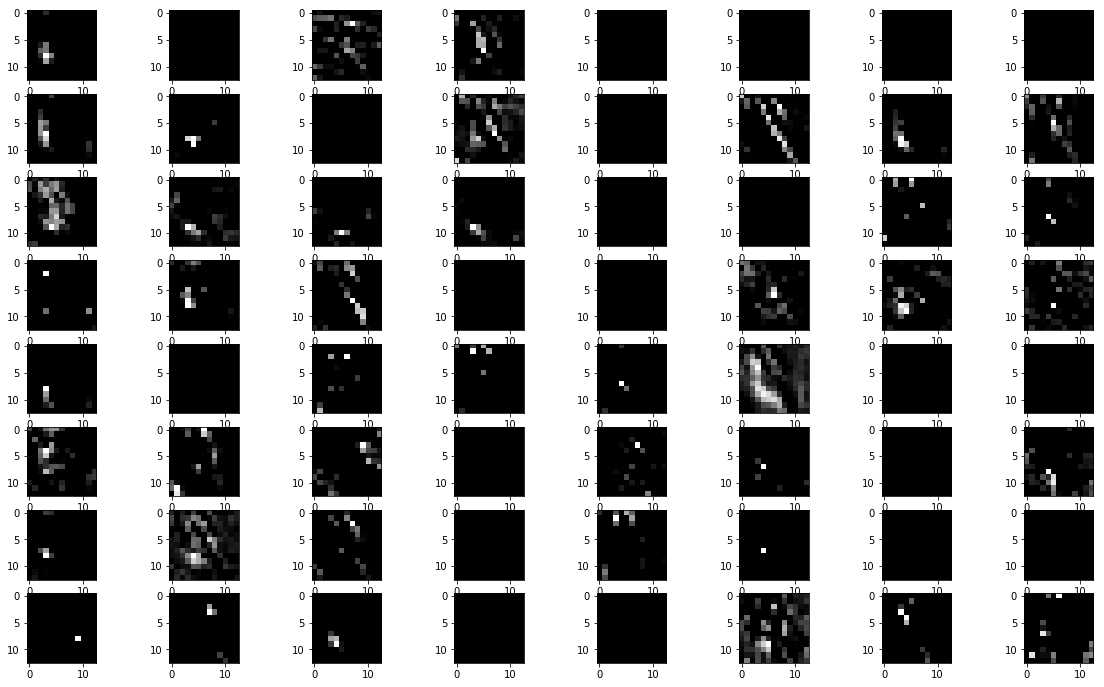

In [0]:
# Visualizing Xtrain[12]_layer 2
print_example_and_activations(X_train[12], 8, 8, 2)

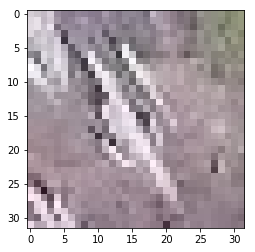

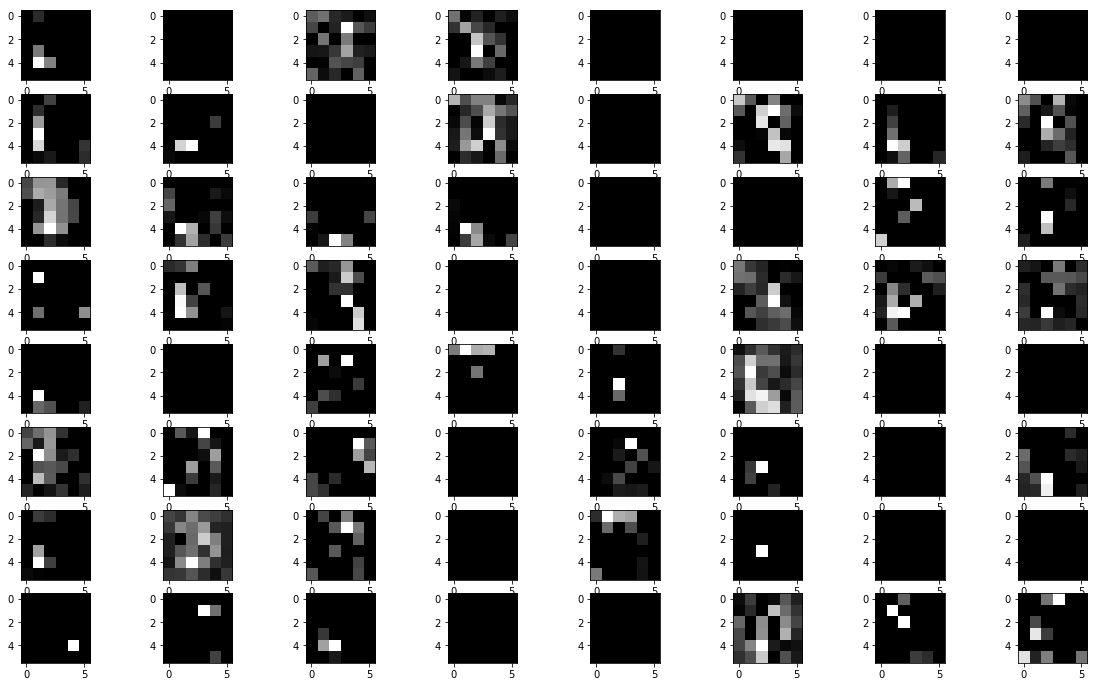

In [0]:
# Visualizing Xtrain[12]_layer 3
print_example_and_activations(X_train[12], 8, 8, 3)

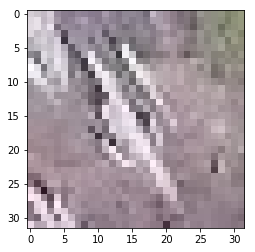

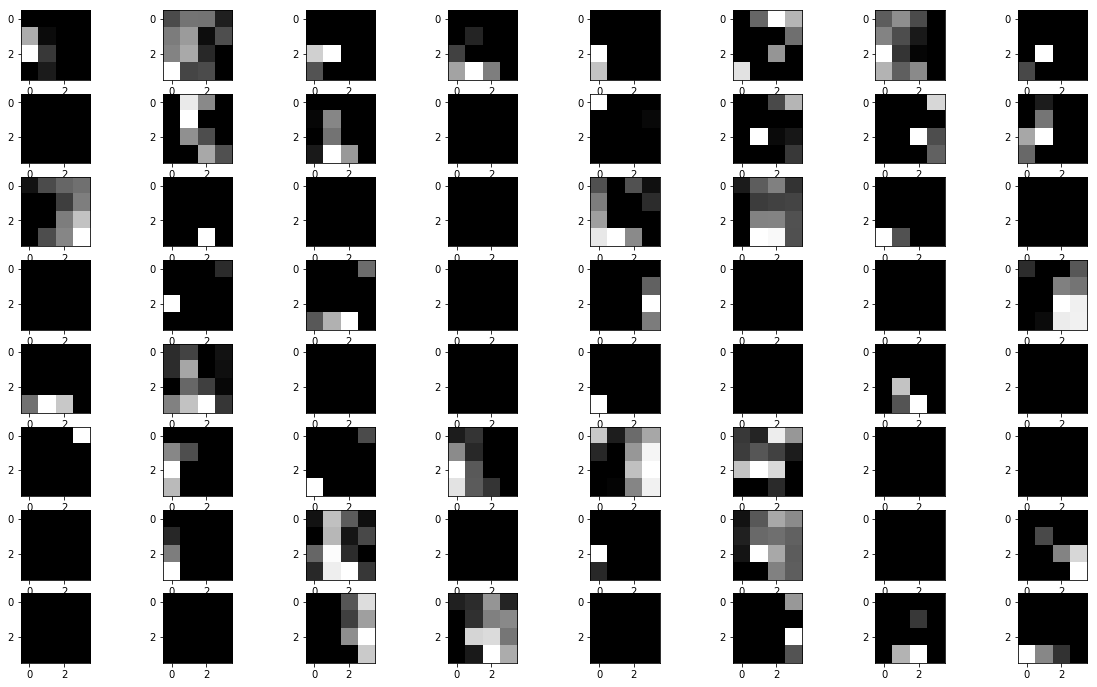

In [0]:
# Visualizing Xtrain[12]_layer 4
print_example_and_activations(X_train[12], 8, 8, 4)

#### demo_3: modified CNN

In [0]:
M_cnn_model = tf.keras.Sequential()

M_cnn_model.add(tf.keras.layers.Conv2D(16, (1,1), activation='relu', input_shape=(32,32,3)))
M_cnn_model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
M_cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
M_cnn_model.add(tf.keras.layers.Conv2D(32, (1,1), activation='relu'))
M_cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
M_cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
M_cnn_model.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))
M_cnn_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

M_cnn_model.add(tf.keras.layers.Flatten())
M_cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
M_cnn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

M_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
M_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 32)        1056      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)         

In [0]:
M_history = M_cnn_model.fit(train_ds, epochs=20, steps_per_epoch=400, validation_data=validation_ds)

Epoch 1/20
400/400 [==============================] - 34s 86ms/step - loss: 0.2172 - accuracy: 0.9101 - val_loss: 0.1253 - val_accuracy: 0.9571
Epoch 2/20
400/400 [==============================] - 29s 71ms/step - loss: 0.1069 - accuracy: 0.9601 - val_loss: 0.0758 - val_accuracy: 0.9706
Epoch 3/20
400/400 [==============================] - 29s 73ms/step - loss: 0.0828 - accuracy: 0.9690 - val_loss: 0.0636 - val_accuracy: 0.9763
Epoch 4/20
400/400 [==============================] - 30s 75ms/step - loss: 0.0569 - accuracy: 0.9795 - val_loss: 0.0483 - val_accuracy: 0.9811
Epoch 5/20
400/400 [==============================] - 28s 70ms/step - loss: 0.0622 - accuracy: 0.9776 - val_loss: 0.0512 - val_accuracy: 0.9800
Epoch 6/20
400/400 [==============================] - 28s 71ms/step - loss: 0.0441 - accuracy: 0.9833 - val_loss: 0.0899 - val_accuracy: 0.9686
Epoch 7/20
400/400 [==============================] - 30s 74ms/step - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.0551 - val_accuracy:

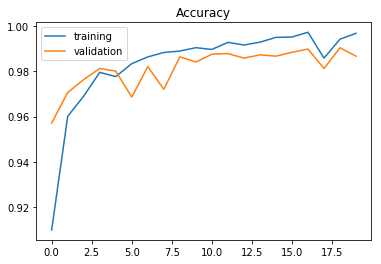

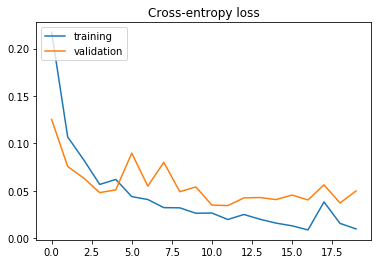

In [0]:
plot_accuracies_and_losses(M_history) 

In [0]:
# Following the example in https://www.kaggle.com/amarjeet007/visualize-cnn-with-keras
M_layer_outputs = [layer.output for layer in M_cnn_model.layers]
M_activation_model = tf.keras.Model(inputs=M_cnn_model.input, outputs=M_layer_outputs)

def M_print_example_and_activations(example, col_size, row_size, act_index): 
    example_array = img_to_tensor(example).numpy()
    plt.imshow(example_array)
    activations = M_activation_model.predict(example_array.reshape(1,32,32,3)) # batch of 1 - just the example array
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray') # image for the first (and only) element in the batch at activation_index
            activation_index += 1

### Visualizing modified CNN model learns

In [0]:
X_train[2],y_train[2]

('/content/data/train/d24534494a7237d1ec130a9d56aa03fe.jpg', 0)

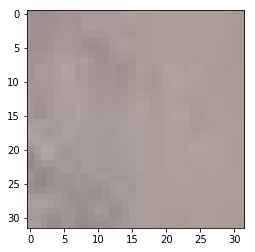

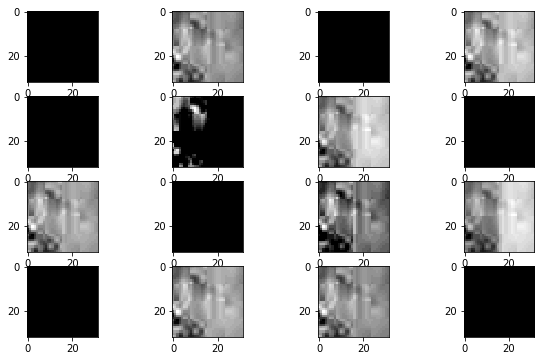

In [0]:
# Visualizing M_Xtrain[2]_layer 0
M_print_example_and_activations(X_train[2], 4, 4, 0)

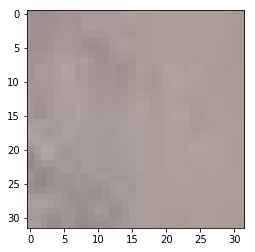

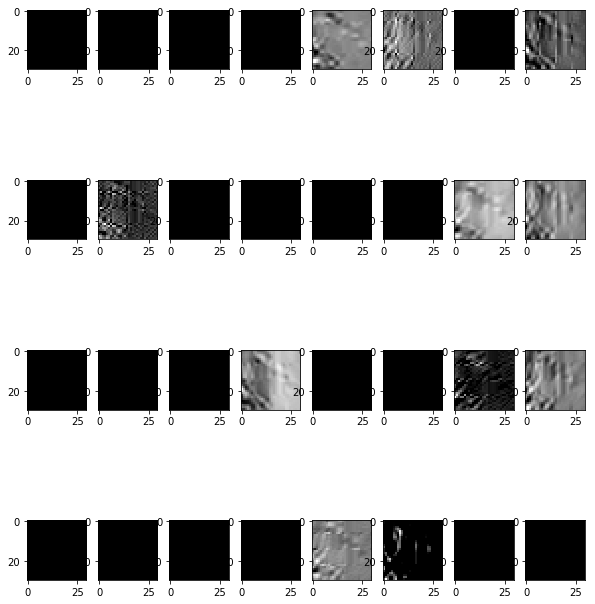

In [0]:
# Visualizing Xtrain[2]_layer 1
M_print_example_and_activations(X_train[2], 8, 4, 1)

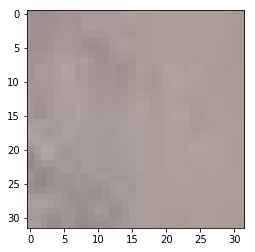

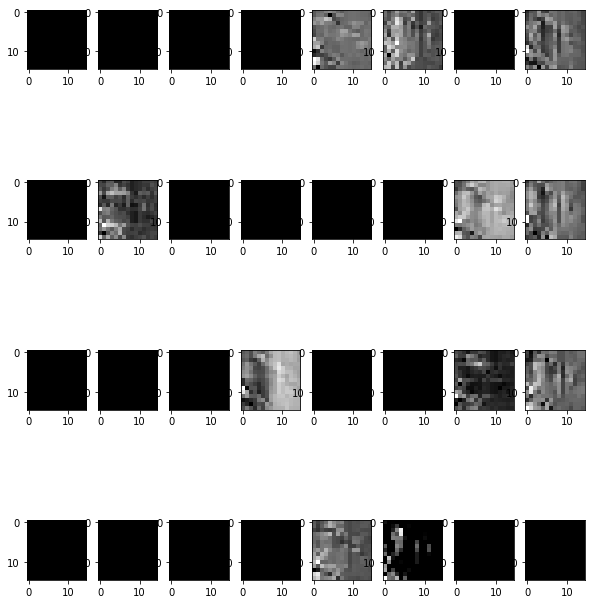

In [0]:
# Visualizing Xtrain[2]_layer 2
M_print_example_and_activations(X_train[2], 8, 4, 2)

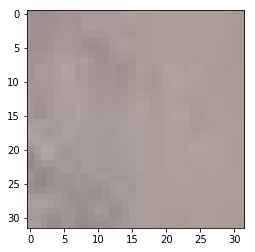

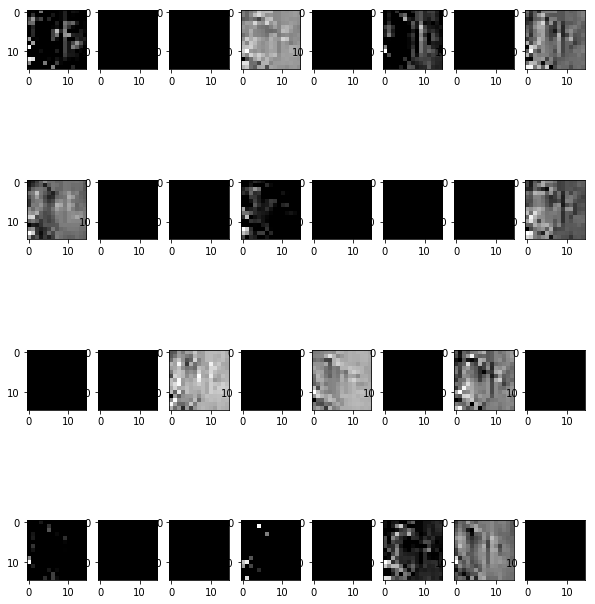

In [0]:
# Visualizing Xtrain[2]_layer 3
M_print_example_and_activations(X_train[2], 8, 4, 3)

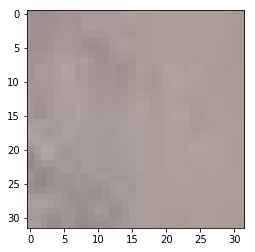

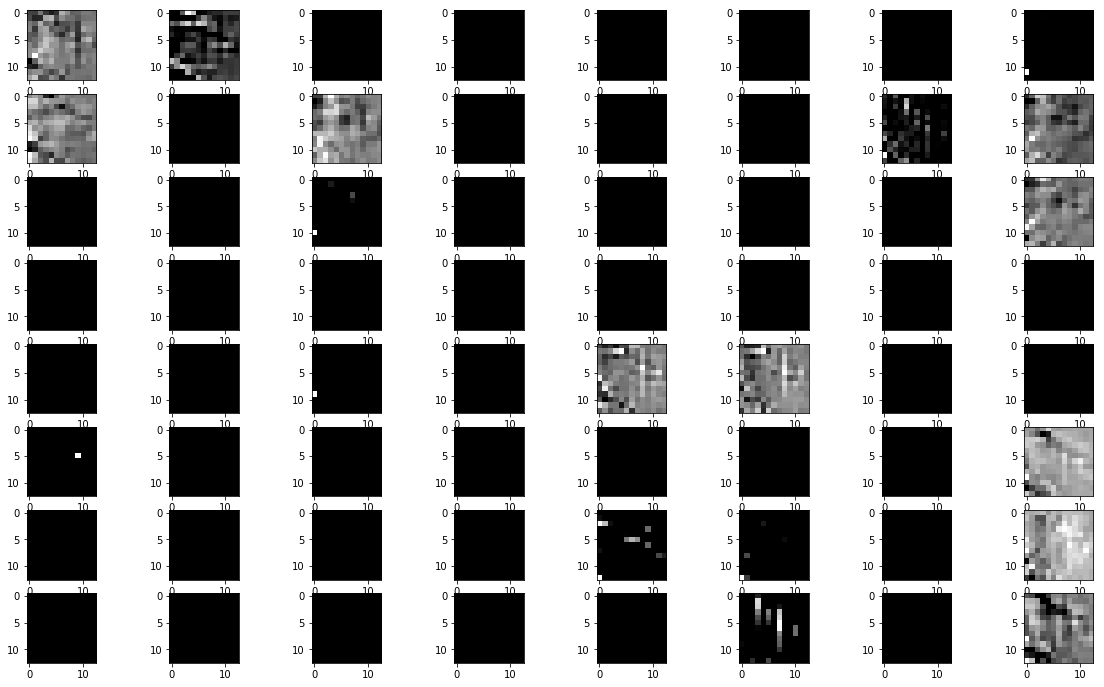

In [0]:
# Visualizing Xtrain[2]_layer 4
M_print_example_and_activations(X_train[2], 8, 8, 4)

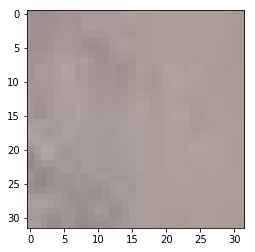

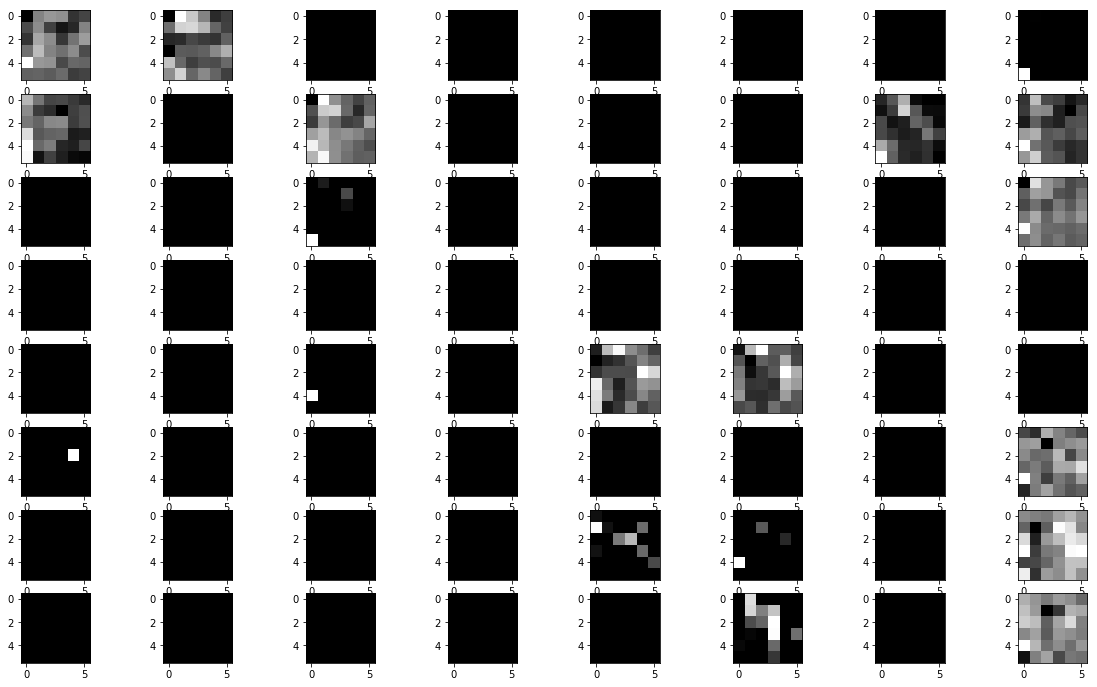

In [0]:
# Visualizing Xtrain[2]_layer 5
M_print_example_and_activations(X_train[2], 8, 8, 5)

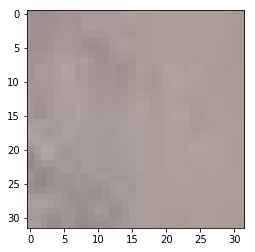

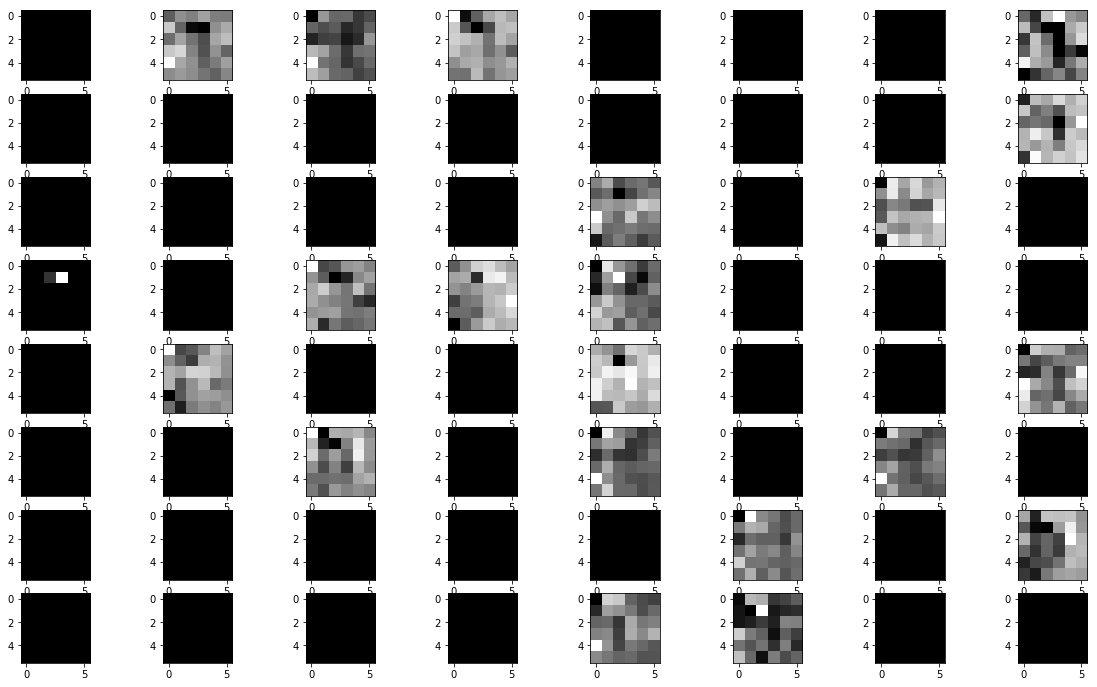

In [0]:
# Visualizing Xtrain[2]_layer 6
M_print_example_and_activations(X_train[2], 8, 8, 6)

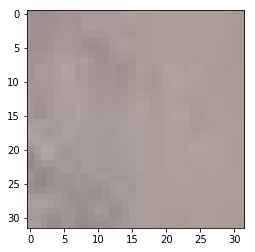

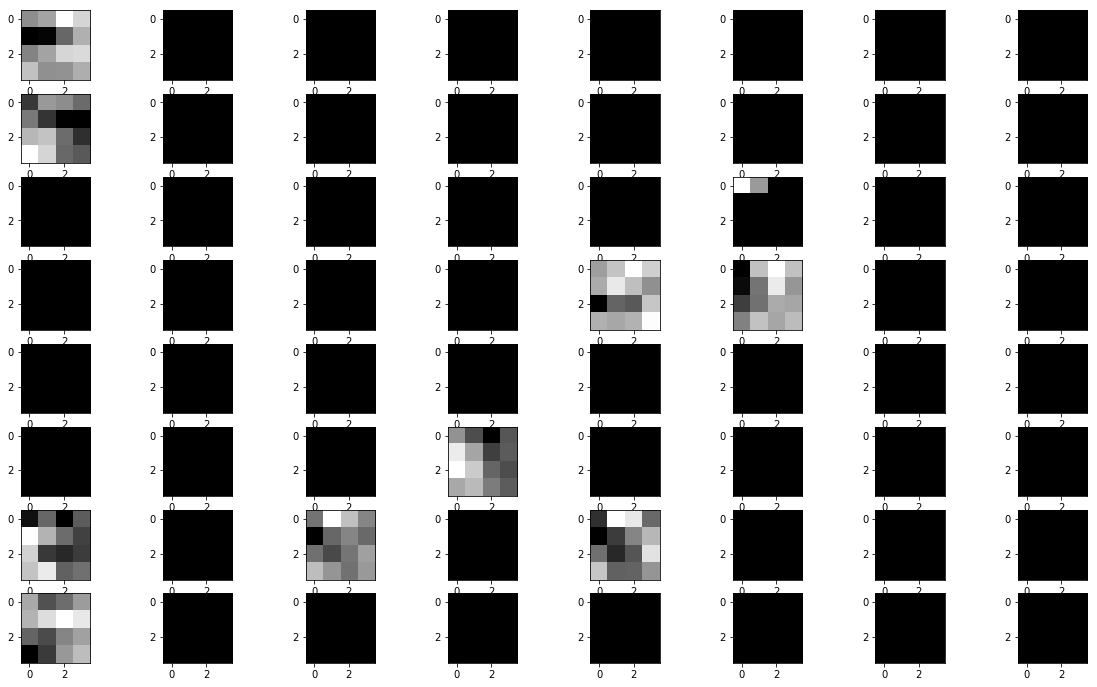

In [0]:
# Visualizing Xtrain[2]_layer 7
M_print_example_and_activations(X_train[2], 8, 8, 7)

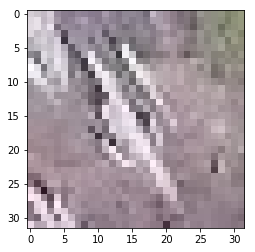

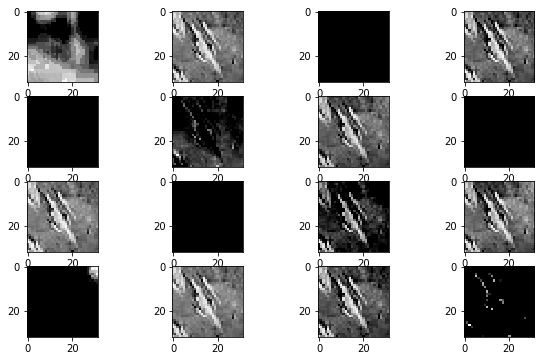

In [0]:
# Visualizing Xtrain[12]_layer 0
M_print_example_and_activations(X_train[12], 4, 4, 0)

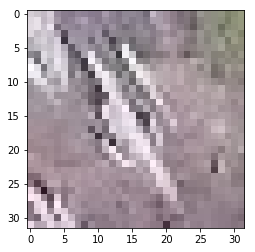

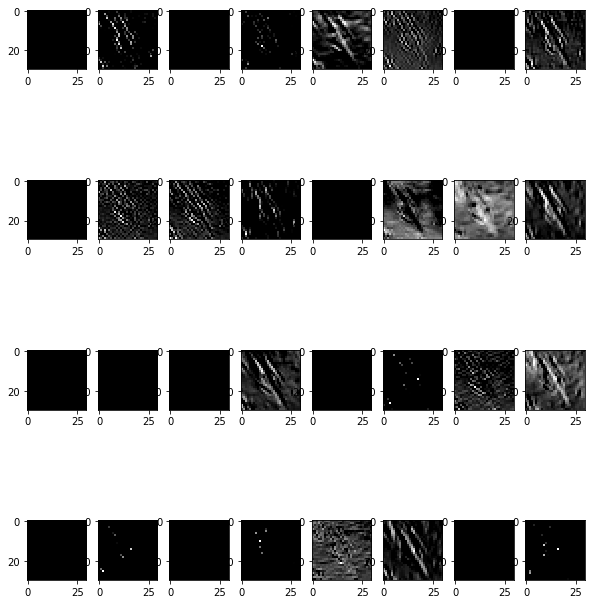

In [0]:
# Visualizing Xtrain[12]_layer 1
M_print_example_and_activations(X_train[12], 8, 4, 1)

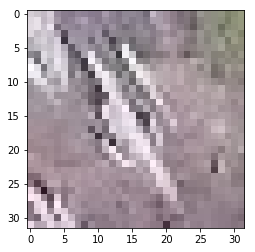

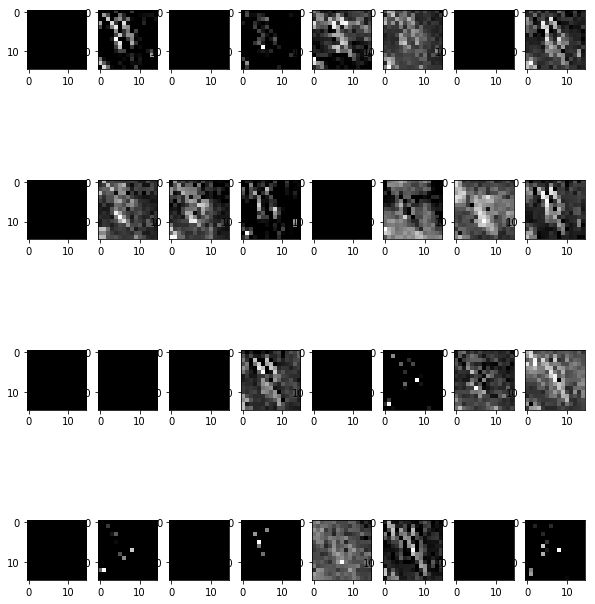

In [0]:
# Visualizing Xtrain[12]_layer 2
M_print_example_and_activations(X_train[12], 8, 4, 2)

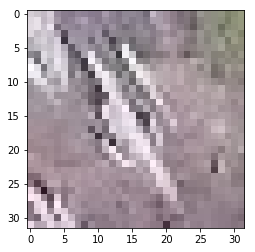

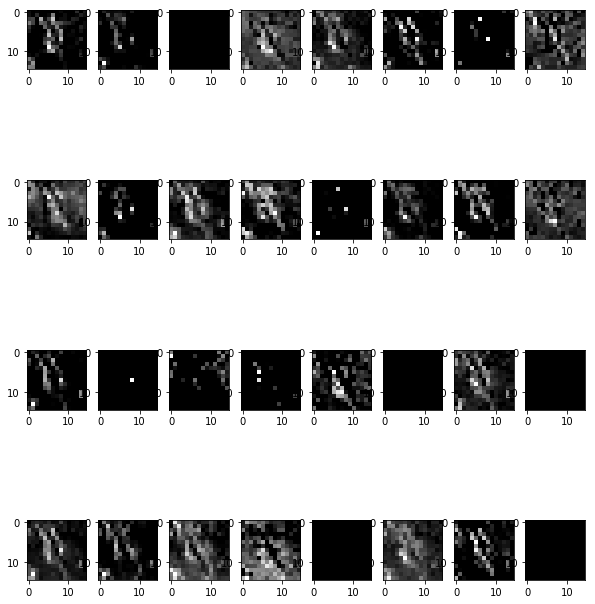

In [0]:
# Visualizing Xtrain[12]_layer 3
M_print_example_and_activations(X_train[12], 8, 4, 3)

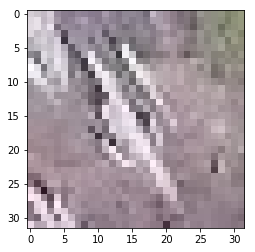

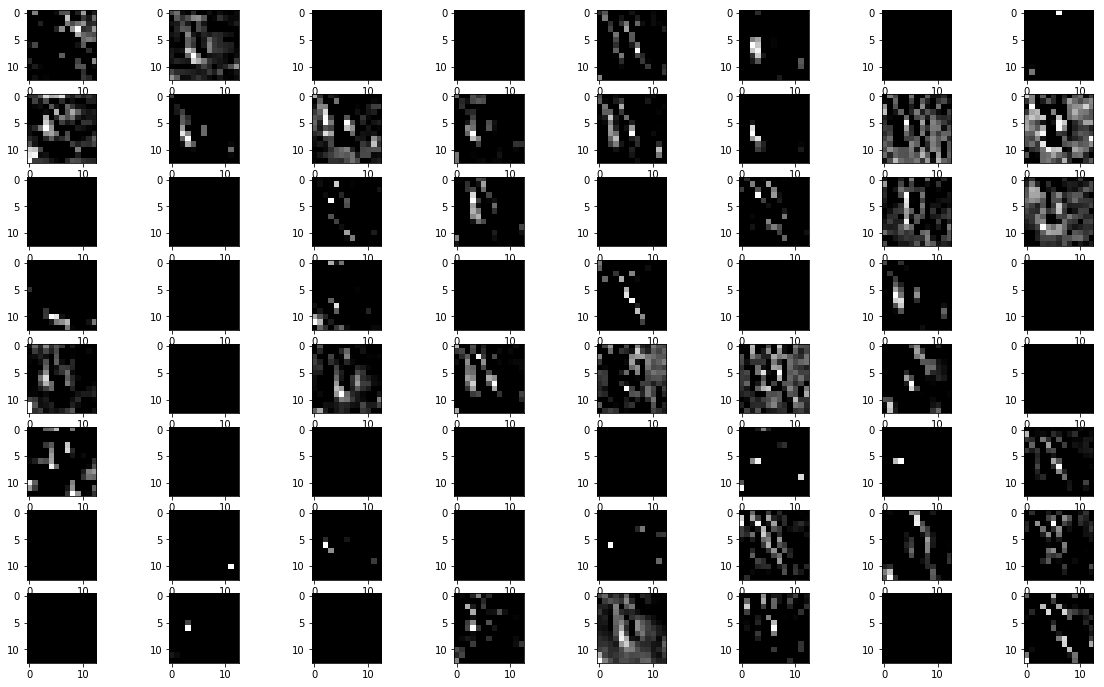

In [0]:
# Visualizing Xtrain[12]_layer 4
M_print_example_and_activations(X_train[12], 8, 8, 4)

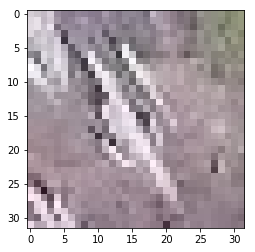

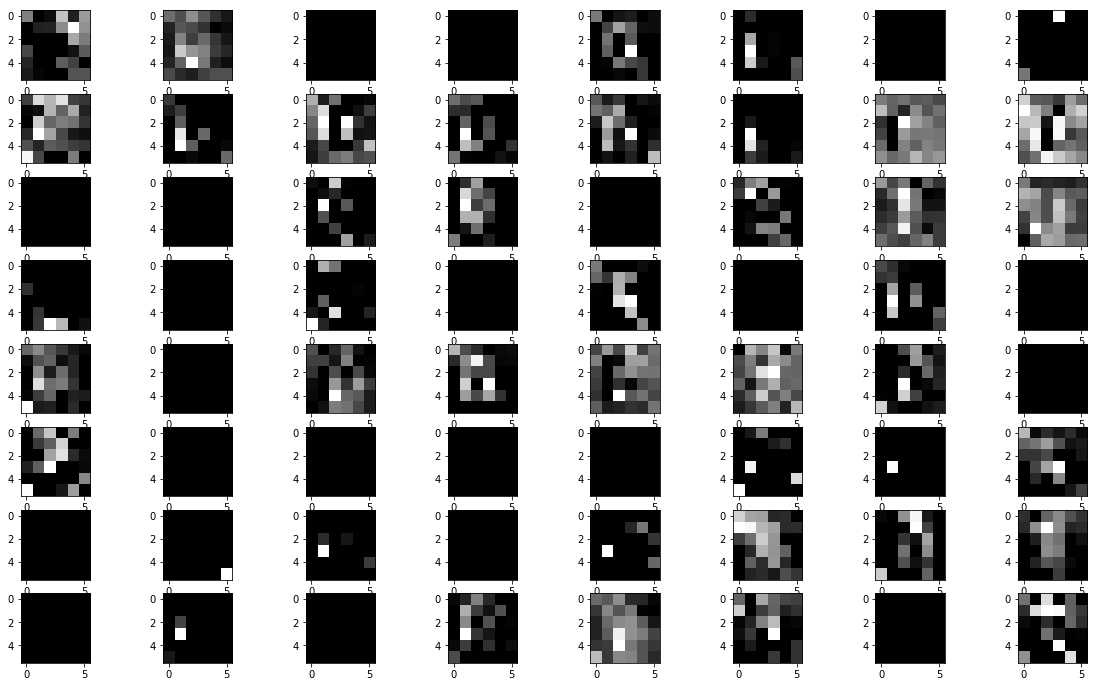

In [0]:
# Visualizing Xtrain[12]_layer 5
M_print_example_and_activations(X_train[12], 8, 8, 5)

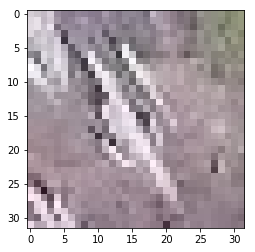

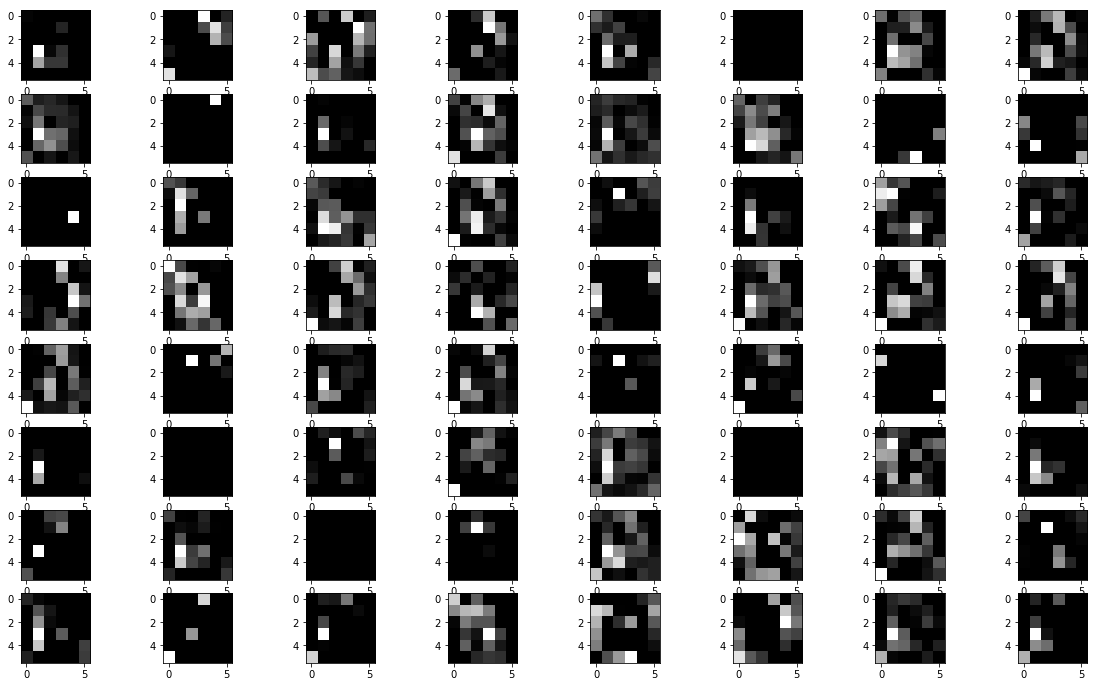

In [0]:
# Visualizing Xtrain[12]_layer 6
M_print_example_and_activations(X_train[12], 8, 8, 6)

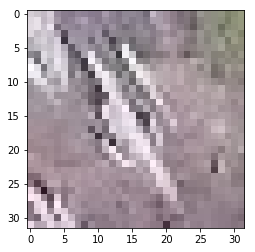

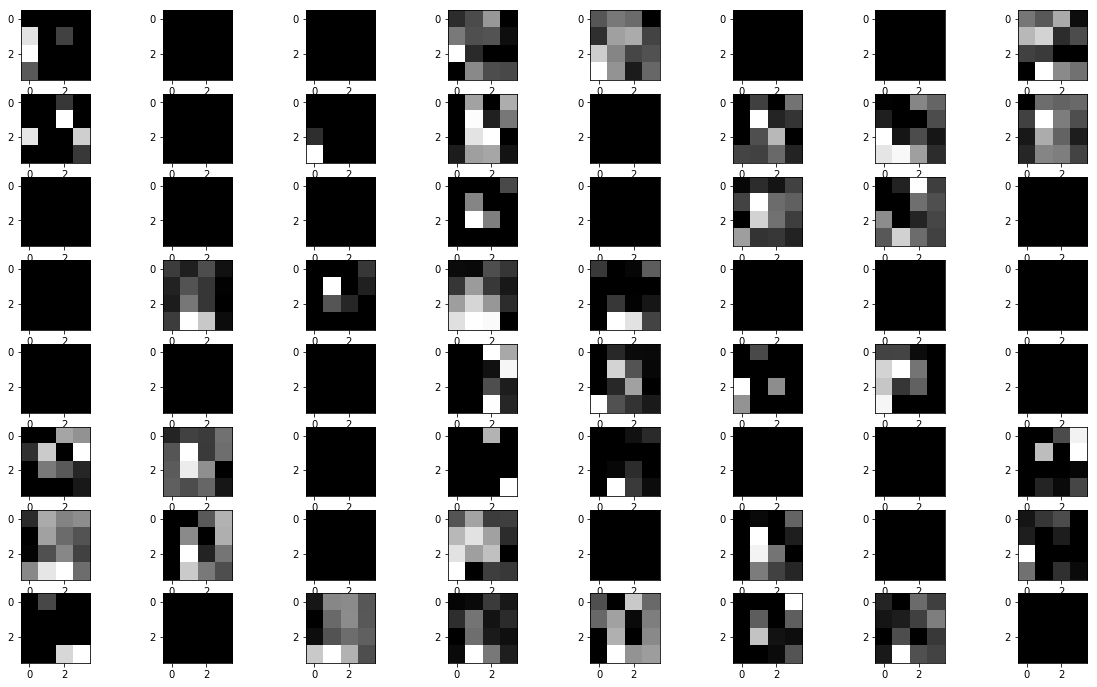

In [0]:
# Visualizing Xtrain[12]_layer 7
M_print_example_and_activations(X_train[12], 8, 8, 7)

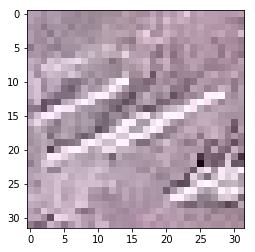

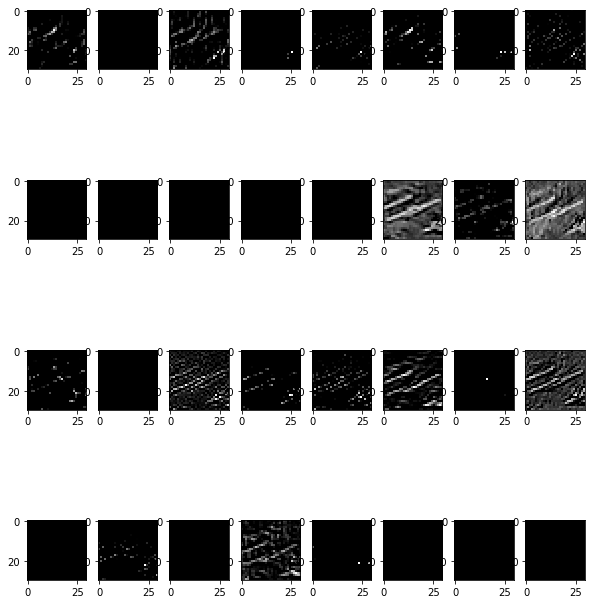

In [0]:
# Visualizing Xtrain[13]_layer 0
print_example_and_activations(X_train[13], 8, 4, 0)

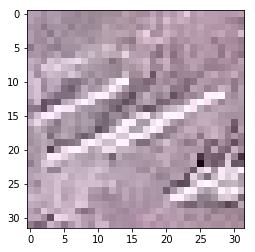

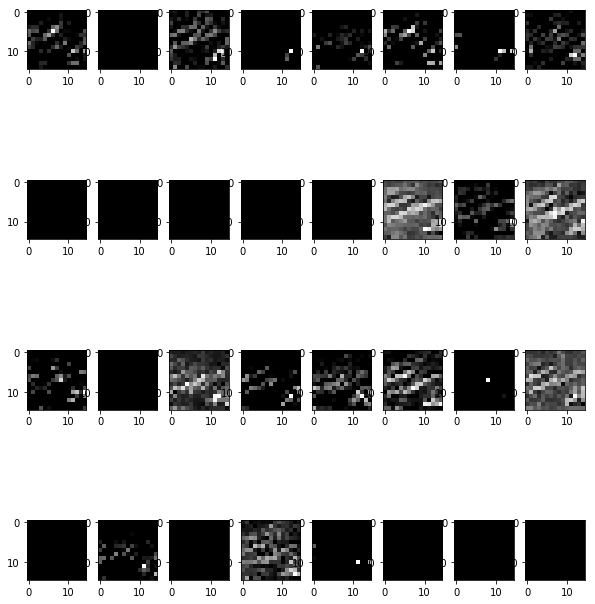

In [0]:
# Visualizing Xtrain[13]_layer 1
print_example_and_activations(X_train[13], 8, 4, 1)

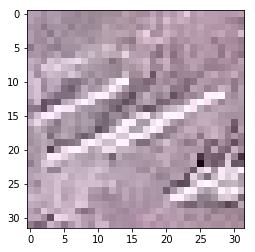

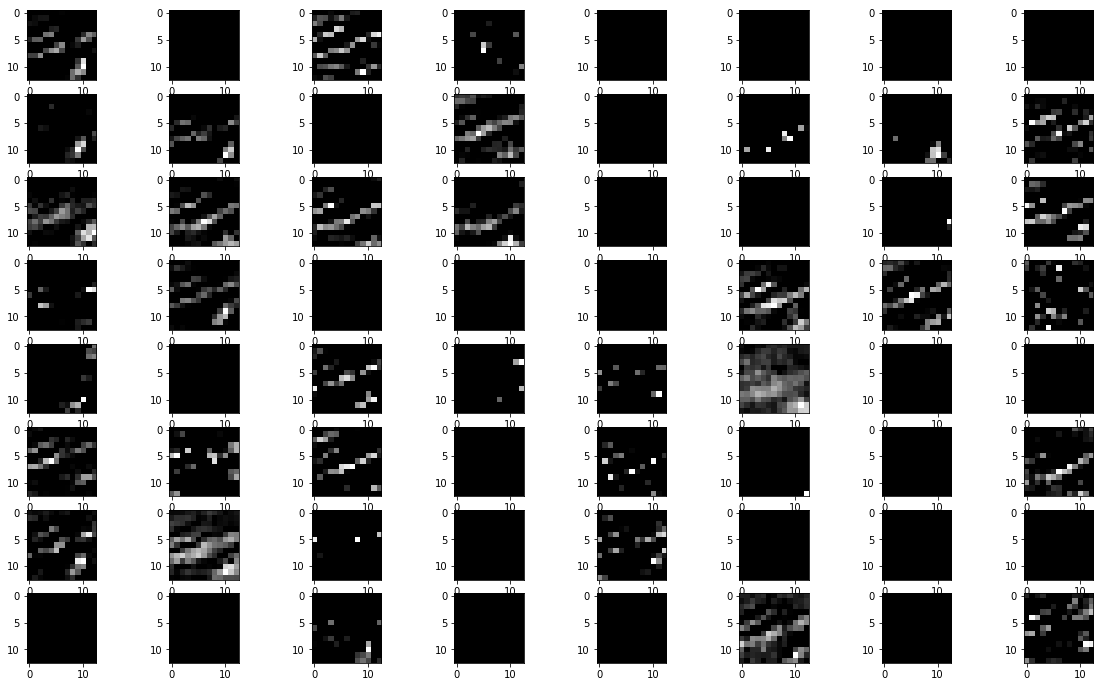

In [0]:
# Visualizing Xtrain[13]_layer 2
print_example_and_activations(X_train[13], 8, 8, 2)

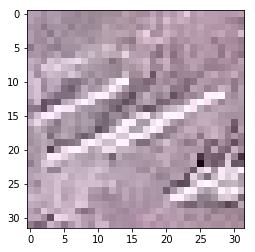

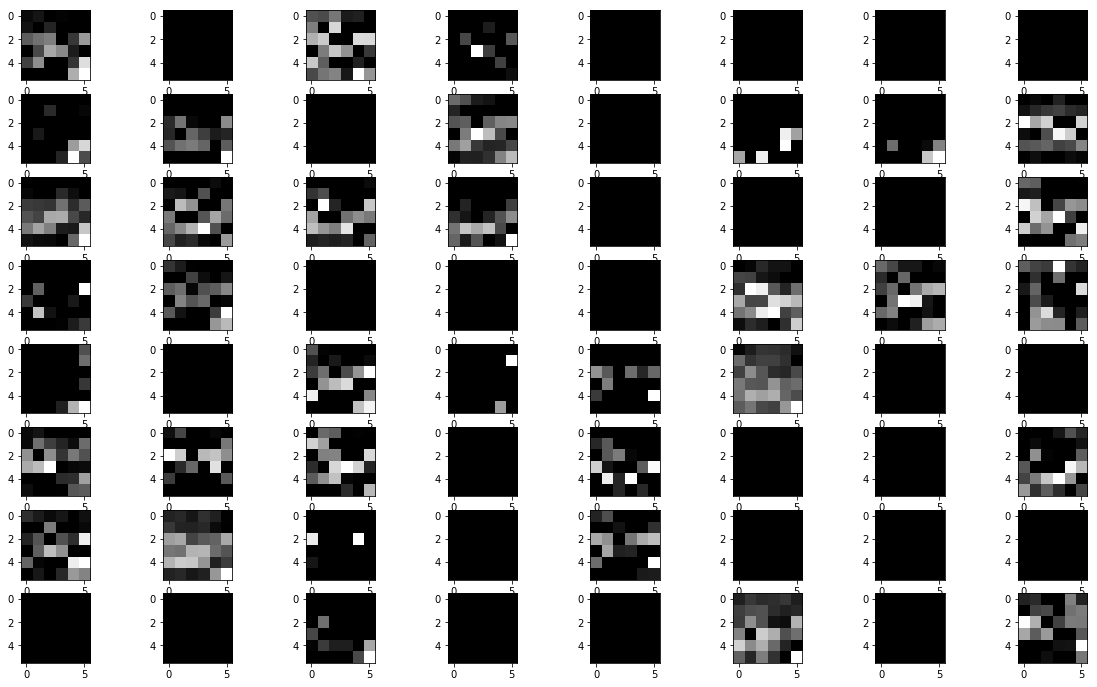

In [0]:
# Visualizing Xtrain[13]_layer 3
print_example_and_activations(X_train[13], 8, 8, 3)

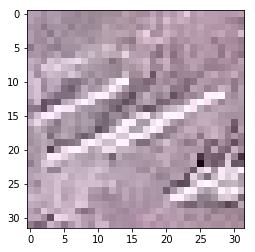

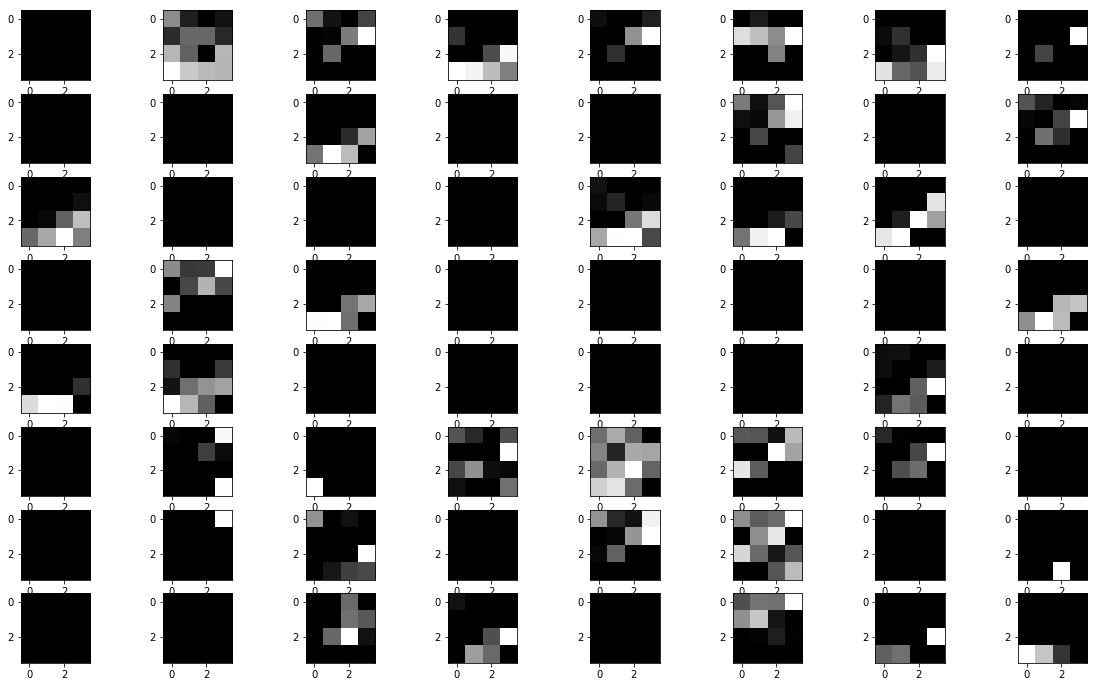

In [0]:
# Visualizing Xtrain[13]_layer 4
print_example_and_activations(X_train[13], 8, 8, 4)